In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('figure', facecolor='w')

In [2]:
def read_sd(filename):
    return np.loadtxt(filename).T

def plot_sd_single(ax, filename, label):
    x, y = read_sd(filename)
    ax.plot(x, y, label=label)

In [3]:
filenames = {
    'Gas phase': {
        'La': [
            {'filename': 'B3LYP/B3LYP_gas_La_SD.dat',
             'label': 'MD B3LYP'},
            {'filename': 'B3LYP/VG_35_B3LYP_La_SD.dat',
             'label': 'VG B3LYP'}
        ],
        'Lb': [
            {'filename': 'B3LYP/B3LYP_gas_Lb_SD.dat',
             'label': 'MD B3LYP'},
            {'filename': 'B3LYP/VG_35_B3LYP_Lb_SD.dat',
             'label': 'VG B3LYP'}
        ]
    },
    'Water': {
        'La': [
            {'filename': 'B3LYP/B3LYP_ElEmb_La_SD.dat',
             'label': 'MD B3LYP water'},
            {'filename': 'B3LYP/VG_15_B3LYP_La_SD.dat',
             'label': 'VG B3LYP HWHM 15 cm$^{-1}$'},
            {'filename': 'B3LYP/B3LYP_gas_La_SD.dat',
             'label': 'VG B3LYP'},
            {'filename': 'B3LYP/VG_35_B3LYP_La_SD.dat',
             'label': 'VG B3LYP HWHM 35 cm$^{-1}$'}
        ],
        'Lb': [
            {'filename': 'B3LYP/B3LYP_ElEmb_Lb_SD.dat',
             'label': 'MD B3LYP water'},
            {'filename': 'B3LYP/VG_15_B3LYP_Lb_SD.dat',
             'label': 'VG B3LYP HWHM 15 cm$^{-1}$'},
            {'filename': 'B3LYP/B3LYP_gas_Lb_SD.dat',
             'label': 'VG B3LYP'},
            {'filename': 'B3LYP/VG_35_B3LYP_Lb_SD.dat',
             'label': 'VG B3LYP HWHM 35 cm$^{-1}$'}
        ]
    }
}

titles = {
    'Gas phase': {
        'La': 'B3LYP La spectral density in vacuum',
        'Lb': 'B3LYP Lb spectral density in vacuum',
    },
    'Water': {
        'La': 'B3LYP La spectral density',
        'Lb': 'B3LYP Lb spectral density',
    }
}

systems = ['Gas phase', 'Water']
states = ['La', 'Lb']

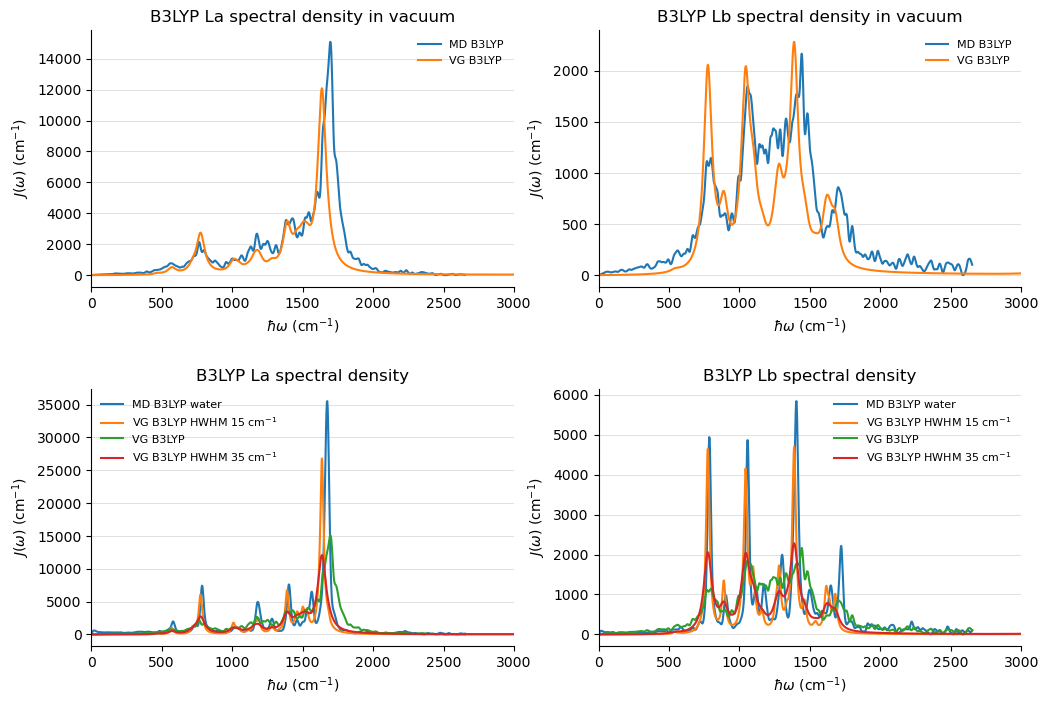

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4)

for system, system_axs in zip(systems, axs):
    for state, ax in zip(states, system_axs):
        for item in filenames[system][state]:
            plot_sd_single(ax, **item)
        ax.set_xlim([0, 3000])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.grid(axis='y', linewidth=0.5, color='lightgrey')
        ax.set_xlabel('$\hbar \omega$ (cm$^{-1}$)')
        ax.set_ylabel('$J(\omega)$ (cm$^{-1}$)')
        ax.set_title(titles[system][state])
        ax.legend(frameon=False, fontsize=8)
    
fig.savefig('FigS10.png', dpi=300, bbox_inches='tight')
plt.show()